<a href="https://colab.research.google.com/github/HosseinEyvazi/Deep-Learning/blob/main/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNNs)

CNNs are a specialized type of neural network designed to process data with a grid-like topology, such as images and videos. Their architecture excels at automatically and adaptively learning spatial hierarchies of features from input data.

## Why "Convolutional"? An Intuitive Example

The term "convolutional" comes from the mathematical operation of convolution. Think of it like this: we "slide" a small matrix (the filter or kernel) over the input image, performing element-wise multiplication and summing the results to produce a single output pixel.

Imagine a 3x3 filter sliding across a larger image. Each set of 9 pixels under the filter is combined into a single pixel in the output feature map. So, essentially, we're convolving a 3x3 neighborhood of pixels into one. This process is repeated across the entire image, creating a transformed representation.

CNNs use layers of these convolutional filters to extract hierarchical features from the input data.

## Spatial Hierarchies: Learning Patterns at Different Abstraction Levels

CNNs capture spatial hierarchies by learning different patterns at different levels of abstraction.

-   **Early Layers:** Detect basic features like edges and corners.
-   **Middle Layers:** Combine these features to recognize textures and shapes.
-   **Later Layers:** Assemble these into high-level objects and parts.

This hierarchical approach enables CNNs to understand complex scenes and relationships within the data.

## Parameter Efficiency: Weight Sharing

One of the critical advantages of CNNs is their parameter efficiency. This is primarily achieved through **weight sharing.**

In a convolutional layer, the same filter (set of weights) is applied across the entire input. This means that instead of learning separate weights for each location in the input, the network learns one set of weights that are used everywhere. This drastically reduces the number of parameters and computational cost.

## Translation Invariance: Recognizing Objects Regardless of Position

CNNs exhibit a degree of translation invariance, meaning they can recognize objects even if they appear in different parts of the image. This is largely due to **pooling layers**. \
Pooling in CNNs aggregates features over local regions. This means that if an object shifts slightly, the pooled output remains similar, ensuring translation invariance.


For example, a CNN trained to recognize cats can identify a cat whether it's in the top-left corner, the bottom-right corner, or anywhere else in the image. Pooling layers reduce the spatial resolution of the feature maps, making the network less sensitive to the exact location of features.

## End-to-End Learning: Automatic Feature Extraction

CNNs excel at end-to-end learning, meaning they learn features directly from the raw data without the need for manual feature engineering.

-   **CNNs:** Automatically learn relevant features through convolutional layers.
-   **FNNs (Fully Connected Neural Networks):** Typically require manual feature engineering, where domain experts design features that are then fed into the network.

CNNs integrate feature extraction into the learning process, often outperforming FNNs in tasks involving spatial data.

## Applications of CNNs

CNNs have a wide range of applications, including:

-   **Image Classification:** Assigning a label to an entire image (e.g., "cat," "dog," "car").
-   **Object Detection:** Identifying and localizing multiple objects within an image (e.g., detecting all cars and pedestrians in a scene).
-   **Semantic Segmentation:** Assigning a label to each pixel in an image. (Note 1: Semantic segmentation is a deep learning algorithm that associates a label or category with every pixel in an image. Note 2: In semantic segmentation, each pixel is a datapoint, not a feature.)
-   **Facial Recognition:** Identifying individuals based on their facial features (a specific application of object detection).
-   **Medical Imaging:** Analyzing medical images (e.g., X-rays, MRIs) to detect diseases or abnormalities.

### Semantic vs. Instance Segmentation
- **Semantic Segmentation:** Classifies each pixel into a category (e.g., "sky," "road," "person"). All instances of the same object class are treated as a single entity.
- **Instance Segmentation:** Identifies and delineates each individual object instance separately (e.g., differentiating between individual people in a crowd).
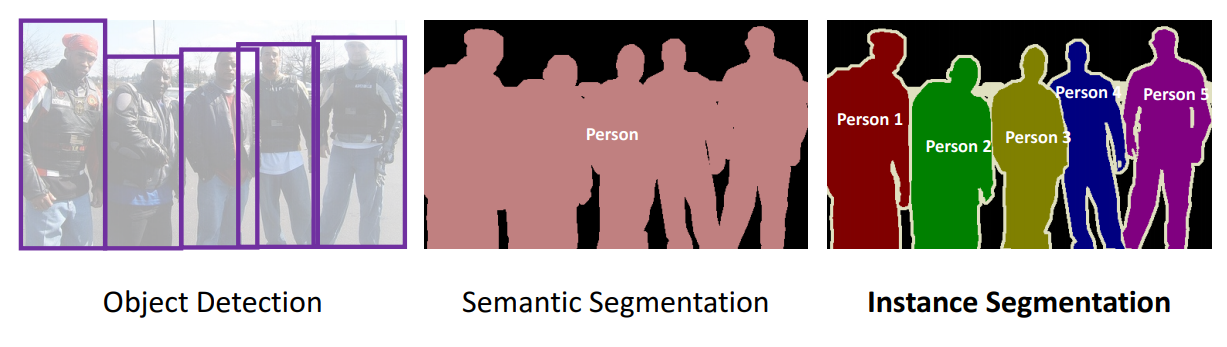

### Background vs. Foreground
- **Background:** The part of the image that is not the main focus.
- **Foreground:** The main subject or object of interest in the image.

## CNNs vs. FNNs: Why Choose CNNs?

When dealing with grid-like data, CNNs often outperform FNNs due to:

-   **Efficient Processing:** CNNs handle high-dimensional data (like images) more efficiently than FNNs due to weight sharing and local connectivity.
-   **Handles High Dimensional Data:** Achieved by weight sharing and local connectivity which reduces the number of parameters significantly.
-   **Local Feature Detection:** CNNs can detect local features by considering neighboring pixels together, unlike FNNs, which treat each pixel independently. (Example: FNNs treat each pixel independently, ignoring spatial relationships. CNNs, on the other hand, consider the context of neighboring pixels when extracting features.)
-   **Translation Invariance:** CNNs can recognize objects regardless of their location in the image.
-   **Fewer Parameters:** Due to weight sharing, CNNs typically have far fewer parameters than FNNs for the same task, reducing the risk of overfitting.

## How CNNs Work: A Step-by-Step Overview

CNNs typically consist of several key layers:

1.  **Convolution:** This is the core building block of CNNs.
    -   **Filters/Kernels:** Small matrices that slide across the input, performing element-wise multiplication and summing the results. Each pixel of the filter has a weight, enabling feature extraction.
    -   **Weight Sharing:** The same filter is applied across the entire input, reducing the number of parameters.
    -   **Stride:** A hyperparameter that determines how far the filter moves at each step. A larger stride can lead to underfitting, while a smaller stride can lead to overfitting or increased computational cost.
    -   **Formula:** A `m*m` kernel applied to a `n*n` image results in a reduced size. Output size can be calculated as `(n-(m+1)) * (n-(m+1))`.
    -   **Best Practice:** 3x3 convolutions are commonly used.
    -   **Odd-Sized Convolutions:** Filters with odd dimensions (e.g., 3x3, 5x5) are preferred because they have a central pixel, making it easier to reason about the filter's receptive field.
    -   **FNN Input vs CNN Input:** Note that the input to an FNN is a flattened image matrix, while CNNs modify the input data and consider neighboring pixels.
    -   **Issue: Convolution sees center pixels more -> Solution: Padding** To ensure all pixels are treated equally, padding is added around the input image.adding padding is based on project itself (form example it's not too important for MNIST dataset)
    -   **Feature Maps:** The **feature map** is the output resulting from applying a filter (kernel) to the input data. Each filter produces a unique feature map, highlighting specific aspects of the input.
    -   **Receptive Fields:** The **receptive field** is the region of the input image that a particular neuron in a convolutional layer is "looking at." As you go deeper into the network, the receptive field of neurons increases, allowing them to capture more context.
    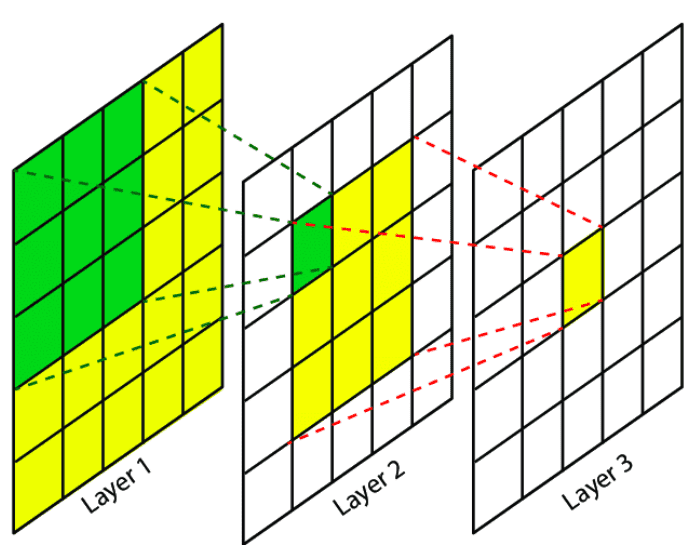

    -   **Filter Initialization:** The initial values of the filter weights are crucial. They can be initialized randomly or using specific techniques. Here are some filter examples:
        *   **Vertical Edge Detector:** A filter with positive values on the left and negative values on the right will detect vertical edges. For example:  
        `[[-1, 0, 1],
         [-1, 0, 1],
          [-1, 0, 1]]`.
        *   **Horizontal Edge Detector:** A filter with positive values on the top and negative values on the bottom will detect horizontal edges. For example:
        `[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]`.
        *   **A filter with positive values on the top and negative values on the bottom detects changes in intensity from top to bottom. Such a filter may be useful for detecting the horizon line in outdoor scenes.**
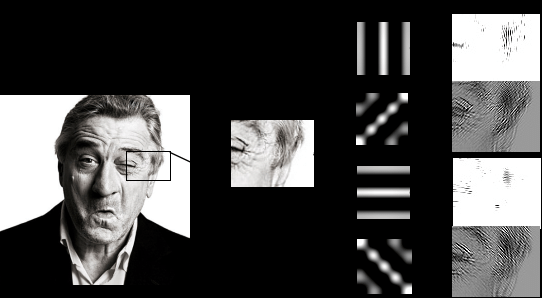

    -   **Multiple Filters:** CNNs use **multiple filters** in each convolutional layer to capture different features from the input. The number of filters is a hyperparameter that needs to be tuned during training. Using multiple filters enables the network to learn a diverse set of features, such as edges, corners, and textures.
    -   **Image Channels:** Images typically have three color channels: Red, Green, and Blue (RGB). When you specify a filter size, such as 3x3, for an RGB image, it's actually a 3x3x3 filter (3x3 across each channel).

2.  **Activation Function:** Introduces non-linearity to the network.
    -   **Best Practice:** ReLU (Rectified Linear Unit) is commonly used due to its simplicity and effectiveness.

3.  **Pooling:** Reduces the spatial dimensions of the feature maps.
    -   **Purpose:** Pooling layers reduce the spatial dimensions of the feature maps, which reduces the number of parameters and computations in the network. It also helps to make the network more robust to variations in the input.
    -   **Types:** Max,min pooling (selects the maximum value in each region) and average pooling (calculates the average value in each region).
    -   **Note:** Average pooling is sensitive to outliers because it averages values.
    -   **Best Practice:** 2x2 pooling with a stride of 2. This reduces the size of the input from `n*n` to `(n-2)/2 * (n-2)/2`.
    -   **Stride Size:** Usually, the stride size is chosen to be the same as the pooling size. Suppose we use max pooling and a pixel has value of 255. If this value is seen twice, output of max pooling will be 255.

## Layer Stacking

CNNs typically consist of multiple convolutional layers, activation functions, and pooling layers stacked together. This stacking allows the network to learn increasingly complex and abstract features. Each layer builds upon the features learned by the previous layers, creating a hierarchy of representations. The deeper the network, the more complex the patterns it can learn.

**NOTE:** The result of a CNN is a set of learned features,
## Important Note: The Result of a CNN

**The result of a CNN is not necessarily a classification or regression outcome. It's a feature engineering process.** The CNN extracts meaningful features from the input data, which can then be used for various tasks, including classification, regression, object detection, and segmentation.


### Data Augmentation & Propaganda: A Quick Guide  

**What is Data Augmentation?**  
Data augmentation enhances datasets by applying transformations to existing data, improving model robustness and preventing overfitting.  

**Why Use It?**  
- Increases data diversity  
- Improves generalization  
- Reduces overfitting  

**Common Techniques:**  
1. **Geometric Changes** – Rotation, flipping, scaling, cropping  
2. **Color Adjustments** – Brightness, contrast, saturation tweaks  
3. **Noise Injection** – Adding Gaussian noise, random erasing  
4. **Mixing Methods** – CutMix, MixUp for blended samples  
5. **Synthetic Data** – GANs, style transfer for new variations  

### **Propaganda & Data Manipulation**  
Propaganda uses selective data, misinformation, or biased augmentation to manipulate perception. Just as augmentation improves models, unethical data alterations can distort reality, emphasizing the need for responsible AI.  

Using data augmentation ethically ensures robust and fair AI systems!

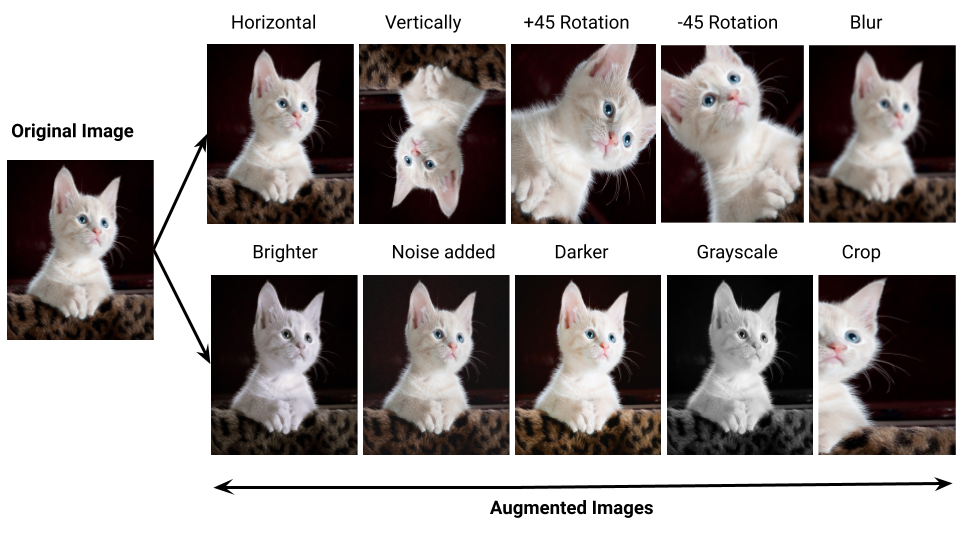

### Handling Overfitting in Deep Learning  

#### Introduction  
Overfitting happens when a model learns patterns specific to training data but fails to generalize. Below are key techniques to handle it.  

---

## **1. Data Augmentation & Propaganda**  
- **Data Augmentation**: Expands dataset diversity with transformations like rotation, flipping, and noise injection.  
- **Propaganda in AI**: Misuse of data augmentation can manipulate perception, leading to biased models. Ethical AI is crucial.  

---

## **2. Regularization**  
- **L1/L2 Regularization**: Adds penalty terms to prevent excessive complexity.  
- **Early Stopping**: Stops training when validation loss starts increasing to prevent overfitting.  

---

## **3. Batch Normalization**  
Batch Normalization (BN) normalizes layer outputs to stabilize training and improve convergence.  
Note : In this context, 'activations' refer to the output values of neurons in a given layer after applying the activation function (like ReLU, Sigmoid, etc.). Batch Normalization normalizes these activations to stabilize training.


### **How Does Batch Normalization Work?**  
1. Computes the mean and variance of activations for each mini-batch.  
2. Normalizes activations using the batch statistics.  
3. Scales and shifts values using learned parameters.  

### **Why Normalize Each Layer?**  
Each layer's activations can shift during training, causing instability. BN reduces this shift and speeds up convergence.  

### **Does BN Fix Issues of Traditional Normalization?**  
Yes! Traditional input normalization helps initially, but BN ensures stable distributions throughout training, addressing internal covariate shift.  

---

## **4. Dropout**  
Dropout randomly deactivates neurons during training, preventing over-reliance on specific features and improving generalization.  

---

### **Conclusion**  
Using these techniques together ensures robust, well-generalized deep learning models!

# Transfer Learning & Freezing Layers in CNNs

## Introduction

Transfer learning allows you to use a pre-trained model for a new task, saving time and resources. Freezing layers helps retain learned features while training on a new dataset.

## Why Freeze Layers?

- **Preserve Knowledge:** Keeps useful features learned in the original task.
- **Reduce Overfitting:** Acts as regularization, especially valuable with limited data.
- **Speed Up Training:** Fewer trainable parameters lead to faster convergence.

## Freezing Strategies

### 1. Freeze Most Layers
- **When:** Very similar task and small dataset.
- **Example:** Adapting a model pre-trained on ImageNet to classify dog breeds.

### 2. Freeze Early Layers
- **When:** Similar task with a medium-sized dataset.
- **Example:** Adapting a model for medical imaging.

### 3. Unfreeze All Layers
- **When:** Dissimilar task with a large dataset.
- **Example:** Adapting a model for a completely different domain.

### 4. Freeze Up to Last Layer
- **When:** Balance needed between pre-trained features and new task adaptation.
- **Example:** Fine-tuning for a specific classification task.

## Conclusion

Select freezing strategies based on task similarity and dataset size. Experiment to find the best approach for your specific use case.

# Fine-Tunning VS Transfer-Learning
fine-tuning is a type of transfer learning.  

- **Transfer Learning**: Using a pre-trained model's learned features for a new task, often by freezing earlier layers and training only the final layers.  
- **Fine-Tuning**: Unfreezing some or all pre-trained layers and retraining them on new data to adapt to the new task.



# **A Short Booklet on ImageNet**  

## **What is ImageNet?**  
ImageNet is a large-scale dataset used for visual recognition tasks. It contains millions of labeled images across thousands of object categories. It is widely used for training and benchmarking deep learning models.  

---  

## **ImageNet Challenge (ILSVRC)**  
The **ImageNet Large Scale Visual Recognition Challenge (ILSVRC)** is an annual competition where models are tested on object classification and detection tasks. It has played a key role in advancing deep learning for computer vision.  

---  

## **What is Top-5 Error?**  
- **Top-1 Error**: The model’s most confident prediction is incorrect.  
- **Top-5 Error**: The correct label is not in the model’s top five predictions.  
- A lower Top-5 Error means better model accuracy, showing improved recognition performance.  

---  

## **Top Models of ImageNet**  

### **1. AlexNet (2012)**  
- First CNN-based model to win ILSVRC.  
- Introduced **ReLU activation** for faster training.  
- Used **dropout** to reduce overfitting.  
- Featured **overlapping max pooling** and multiple GPUs for efficiency.  

### **2. VGG (2014)**  
- Uses **very small (3×3) convolutional filters** for feature extraction.  
- Deep network with **16–19 layers**.  
- Computationally heavy but improved accuracy.  

### **3. GoogLeNet (Inception) (2014)**  
- Introduced **Inception modules** for efficient computation.  
- Reduced parameters compared to VGG while maintaining accuracy.  
- Used **global average pooling** instead of fully connected layers.  

### **4. ResNet (2015)**  
- Introduced **residual connections (skip connections)** to solve vanishing gradient issues.  
- Allowed very deep networks (up to **152 layers**) to be trained successfully.  
- Revolutionized deep learning by making deep architectures feasible.  

---  

## **Conclusion**  
ImageNet has driven progress in deep learning, enabling the development of highly accurate vision models. **AlexNet, VGG, GoogLeNet, and ResNet** have all contributed to state-of-the-art advancements in image recognition.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np




In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((.5),(.5))]) # argument is a pipeline
# we applied converting to Tensor in this part of ANN booklet too: https://colab.research.google.com/drive/15unxITcGMYnOv3v9EXGXgEPopm69gLW2#scrollTo=U7PBZetA8TOD&line=2&uniqifier=1

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform) # download the dataset then apply pipeline of transform
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32 , shuffle=False) # similar to ANNs and any neural networks

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform) # instead of dataloader we have dataset in Keras lib
testloader = torch.utils.data.DataLoader(testset,batch_size=32, shuffle=True)

classes = tuple(str(i) for i in range(10))



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.1MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



The key difference is that **`transforms.ToTensor()`** is specifically designed for image data preprocessing in **PyTorch's torchvision**, while **`torch.tensor()`** is a generic tensor creation function.  

### Why use `transforms.ToTensor()` instead of `torch.tensor()`?  
1. **Image Handling**: `transforms.ToTensor()` automatically converts **PIL images or NumPy arrays** into PyTorch tensors and scales pixel values from **[0, 255] to [0, 1]**.  
2. **Automatic Type Conversion**: Ensures the tensor is of type `torch.float32`, which is required for deep learning models.  
3. **Integrated with torchvision**: Works well in data pipelines for image datasets.  

### Why not `torch.tensor()`?  
- `torch.tensor()` does **not** normalize or scale image data automatically.  
- If you pass a NumPy array with `torch.tensor()`, values will remain in the original range **(e.g., 0-255 for images)**, which can negatively impact training.  
- It does not handle PIL images directly.  

Thus, `transforms.ToTensor()` is the better choice for image preprocessing in CNNs. 🚀

in torch.utils.data.DataLoader
- **`DataLoader`**: **Class** (used for batching and shuffling data).  
- **`data`**: **Module** (contains dataset-related classes like `Dataset`, `DataLoader`).  
- **`utils`**: **Module** (contains utility functions for data handling).  
- **`torch`**: **Package** (PyTorch's main library).
---
- **Module**: A single Python file (`.py`) containing functions, classes, or variables. Example: `torch.utils.data` (a module inside `torch`).  
- **Package**: A collection of modules organized in directories with an `__init__.py` file. Example: `torch` (a package containing multiple modules).

#### How to work with dataloaders?

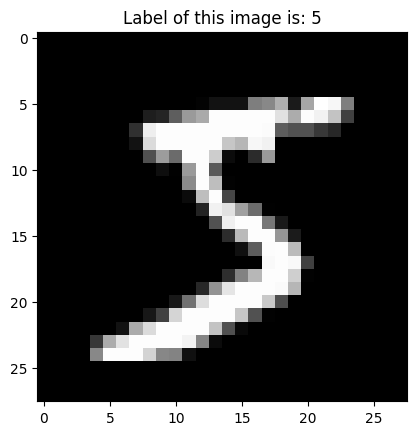

In [ ]:
#trainloader is not subscrptable because it is an object of TrainLoader class only -> convert it to list
# list converted trainloader on a specific batch contains
inputs, labels=list(trainloader)[0] # now inputs variable contains all images of the first batch. labels variable is an array contain lables of the batch

# list of trainloader
plt.title(f'Label of this image is: {labels[0]}')
plt.imshow(inputs[0].squeeze(),cmap="gray") # inputs[0].squeeze() converts the shape from (1, 28, 28) to (28, 28), which is valid for imshow.
plt.show()

this is the size of every images : torch.Size([1, 28, 28])


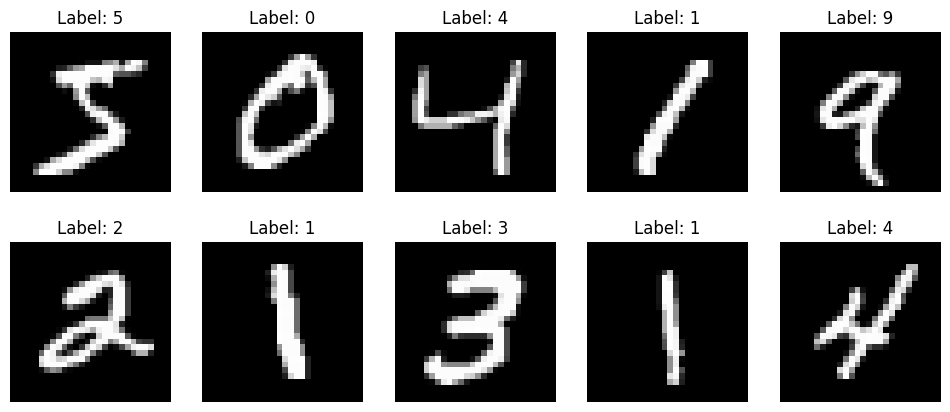

In [ ]:
images, labels = next(iter(trainloader)) #"iter" converts iterable(like trainloaders or arrays) to iterator (now you can apply next method on it)
# now images and labels are images and labels of first batch

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(images[i].squeeze(), cmap='gray') # squeeze() removes dimensions of size 1 from the shape of the numpy-array/tensor. because image[i] is 1*28*28 (1 is showing the number of channels(in MNIST dataset images are grayscale))
  ax.set_title(f'Label: {labels[i]}')
  ax.axis('off') # delete numbers on axes
# plt.tight_layout()
print(f'this is the size of every images : {images[0].shape}') #note that 1 the number of input channels (MNIST dataset is grayscale)

- **SAME padding**: Keeps the **output size the same** as the input by adding padding. Formula:  
  
  Output size  = Input size\Stride
  
- **VALID padding**: **No padding**, so the output size **shrinks** based on the kernel size.  

✅ **SAME → Keeps size**  
❌ **VALID → Reduces size**

# Pytorch's Functional Approach

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__() # calling the parent class constructor
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1) # 1(value first arg of the Conv2d) → Input has 1 channel (grayscale image). 32 is the number of kernels(filters)
    # Conv2D class (2D Convolution) is used for processing images, where the input data has two spatial dimensions: height (H) and width (W).
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

    self.fc1 = nn.Linear(128 * 3 * 3, 256) # this is a fnn layer
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10) # number of classes is 10

    self.pool = nn.MaxPool2d(2, 2)
    self.dropout = nn.Dropout(.25)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))  # Apply BatchNorm after Conv, before activation
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))

    x = x.view(-1, 128 * 3 * 3) # Before passing x into a fully connected (Linear) layer, we must flatten it.
                                # -1 is for determining the value of batchsize dynamically. also "tensor.view" is for doing this

    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)  # No BatchNorm for final layer

    return x


The number "32" in your first convolution layer doesn’t represent the image size; it specifies the number of filters (or output channels) that the convolution will produce. In PyTorch’s `nn.Conv2d`, the parameters are defined as `(in_channels, out_channels, kernel_size, ...)`, where:

- **`in_channels`**: Number of channels in the input image (e.g., 1 for grayscale, 3 for RGB).
- **`out_channels`**: Number of filters that the layer will learn; here it’s set to 32.


This is a formula for applying filter (even pooling or convolutional filter)
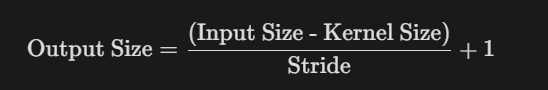

input size will compute as : previous input size + padding*2 if the size of padding is not zero

### CNN Layer Output Sizes (Input: **1×28×28**)  

- **Conv1:** `1 → 32` filters, `kernel=3, stride=1, padding=1`  
  → **Output:** `32 × 28 × 28` → **After 2×2 pooling:** `32 × 14 × 14`  

- **Conv2:** `32 → 64` filters, same settings  
  → **Output:** `64 × 14 × 14` → **After pooling:** `64 × 7 × 7`  

- **Conv3:** `64 → 128` filters, same settings  
  → **Output:** `128 × 7 × 7` → **After pooling:** `128 × 3 × 3`  

- **Flatten:** `128 × 3 × 3 = 1152` features  

- **FC Layers:**  
  - **FC1:** `1152 → 256` (ReLU, Dropout)  
  - **FC2:** `256 → 128` (ReLU)  
  - **FC3:** `128 → 10` (class scores)

While the input channel number changes (from 1 to 3), the only adjustment needed is in the first convolutional layer. Instead of using `nn.Conv2d(1, 32, ...)` for grayscale images, you use `nn.Conv2d(3, 32, ...)` for RGB images. The output dimensions of the layer remain the same, so the rest of the network processes the feature maps just as before.

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    # Set the model to training mode
    model.train()

    # Loop over the number of epochs
    for epoch in range(num_epochs):
        running_loss = 0.0

        # Loop over the training data
        for inputs, labels in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs) # explained in below cell

            # Calculate the loss
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward() # to recompute the weights

            # Update the weights (update weights by the new computed weights)
            optimizer.step()

            # Track loss
            running_loss += loss.item() # item() converts a single-valued tensor into a regular Python number

        # Print the statistics for this epoch
        epoch_loss = running_loss / len(train_loader)

        print(f"Epoch [{epoch+1} of {num_epochs}], Loss: {epoch_loss:.4f}%")

    print("Training complete")





#### **What Do `loss.backward()` and `optimizer.step()` Do?**
- `loss.backward()` computes the **gradients** of the loss with respect to the model’s parameters (weights).  
- These gradients are stored in the `.grad` attribute of each parameter (e.g., `model.weight.grad`).  
- **It does NOT update the weights!** It only calculates how the weights should change to reduce the loss.

To update the gradient we have to use the `optimizer.step()`

**There are no weight updates** during the call to the `model()` method (the forward pass). Here's why:

### **What Happens During `model(inputs)` (forward pass)?**
Note : There is NOT a method with name model.forward!
1. The input data (`inputs`) is passed through the model's layers (e.g., convolutional layers, fully connected layers).
2. The model computes the **output predictions** (`outputs`) using the **current weights** of the model.
3. No changes are made to the model's weights during this process. It simply performs calculations based on the existing weights.


In [ ]:
cnn = CNN()
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Since this is a classification task
optimizer = optim.Adam(cnn.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Train the model
cnn = CNN()
train_model(model=cnn, train_loader=trainloader, criterion=criterion, optimizer=optimizer, num_epochs=5)


Epoch [1 of 5], Loss: 2.3042%
Epoch [2 of 5], Loss: 2.3042%
Epoch [3 of 5], Loss: 2.3042%
Epoch [4 of 5], Loss: 2.3042%
Epoch [5 of 5], Loss: 2.3042%
Training complete


In [ ]:
def evaluate_model(model, test_loader, criterion):
    # Set the model to evaluation mode
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0
    # we dont need to epochs for evaluation of testing
    # Disable gradient computation
    with torch.no_grad(): # The with keyword in Python is used for context management. It ensures that resources (e.g., files, network connections) are properly managed and cleaned up
        for inputs, labels in test_loader:
            # Forward pass
            outputs = model(inputs) # outputs is predicted labels
            # Calculate the loss
            loss = criterion(outputs, labels)
            running_loss += loss

            # Get predictions
            _, predicted_labels = torch.max(outputs, 1) # explained in below cell

            # Track accuracy
            total += labels.size(0) # in PyTorch, tensor.size() is equivalent to numpy.ndarray.shape
            # print(labels)
            correct += (predicted_labels == labels).sum().item()

    # Compute average loss and accuracy
    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    return test_loss, test_accuracy

`_, predicted_label = torch.max(outputs, 1)` : \

This line finds the **predicted class labels** from the model's output (`outputs`). Here's what it does:

1. **`outputs`**: A tensor of shape `[batch_size, num_classes]` containing raw scores (logits) for each class.
2. **`torch.max(outputs, 1)`**:
   - Finds the **maximum value** along dimension `1` (the class dimension).
   - Returns:
     - The **maximum values** (ignored here, assigned to `_`).
     - The **indices** of the maximum values (assigned to `predicted_label`), which are the predicted class labels.

### **Example**:
If `outputs = tensor([[0.1, 0.8, 0.1], [0.3, 0.2, 0.5]])`:
- `torch.max(outputs, 1)` returns:
  - Values: `tensor([0.8, 0.5])` (ignored).
  - Indices: `tensor([1, 2])` (stored in `predicted_label`). \
  this means that the first datapoint and the 2nd one is predicted to class one and two.

### **Result**:
- `predicted_label` contains the predicted class labels for the batch.


In [ ]:
evaluate_model(cnn, testloader, criterion)

tensor([2, 2, 3, 8, 1, 2, 8, 7, 8, 9, 2, 6, 2, 7, 5, 0, 5, 2, 1, 7, 8, 9, 0, 7,
        3, 5, 1, 8, 3, 3, 3, 3])
tensor([1, 7, 4, 7, 7, 9, 7, 0, 5, 4, 8, 7, 8, 7, 6, 4, 3, 1, 9, 7, 2, 4, 3, 9,
        4, 0, 1, 9, 9, 6, 6, 0])
tensor([2, 5, 9, 2, 4, 1, 0, 8, 0, 9, 4, 7, 1, 3, 1, 4, 4, 1, 2, 8, 1, 7, 5, 9,
        3, 3, 3, 1, 1, 1, 8, 1])
tensor([6, 4, 9, 3, 3, 5, 9, 9, 8, 4, 2, 3, 7, 1, 9, 2, 4, 4, 1, 3, 3, 1, 5, 1,
        8, 1, 6, 7, 3, 1, 5, 8])
tensor([8, 7, 4, 2, 6, 6, 0, 0, 9, 7, 4, 0, 4, 9, 9, 6, 4, 8, 9, 9, 2, 4, 7, 4,
        4, 5, 2, 6, 3, 2, 9, 3])
tensor([8, 4, 5, 4, 6, 3, 0, 6, 0, 8, 5, 3, 8, 1, 2, 7, 1, 5, 1, 8, 7, 1, 5, 3,
        4, 8, 3, 2, 1, 6, 9, 5])
tensor([0, 8, 2, 8, 9, 1, 2, 7, 5, 4, 7, 5, 8, 8, 2, 4, 8, 0, 1, 4, 8, 6, 3, 8,
        5, 6, 5, 1, 0, 1, 5, 6])
tensor([1, 3, 7, 8, 2, 7, 3, 2, 6, 8, 1, 1, 9, 5, 6, 4, 5, 8, 9, 2, 4, 6, 6, 8,
        5, 1, 7, 2, 0, 7, 6, 3])
tensor([1, 8, 5, 1, 2, 7, 3, 9, 6, 1, 6, 1, 3, 7, 7, 9, 3, 2, 6, 1, 4, 6, 6, 1,
        4, 1, 1,

(tensor(2.3043), 10.01)

### Evaluation of the model

#### Parameter tuning VS Hyperparameter tuning
Hyperparameter tuning involves optimizing settings that control the learning process, like the number of clusters in DBSCAN or learning rate in neural networks. Parameter tuning, on the other hand, adjusts model-internal values learned from data, like weights in a neural network. Hyperparameters are set before training, while parameters are updated during training.

# Keras's Sequential Approach

Note : instead of DataLoader of Pytorch we have got the Dataset in Keras  

Note : Dropout usually add for Dense layers because of their fully connection.